In [1]:
import pandas as pd
%matplotlib notebook
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

## Importing Dataframes

In [2]:
from dataframes import df1, df2, df3, df4, df5

In [3]:
df3.head()

,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Infant mortality (per 1000 births),GDP ($ per capita),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Codes
Code,,,,,,,,,,,,,,,,,,,,,
ABW,3998,27,48934.248896,Aruba,LATIN AMER. & CARIB,71891,193,3725,589.0,28000.0,...,1053.0,0.0,8947.0,2.0,1103.0,668.0,4.0,333.0,663.0,ABW
AFG,39285,1458,1441.242580,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,480,16307.0,700.0,...,1213.0,22.0,8765.0,1.0,466.0,2034.0,38.0,24.0,38.0,AFG
AGO,4972,183,194.681596,Angola,SUB-SAHARAN AFRICA,12127071,1246700,97,19119.0,1900.0,...,241.0,24.0,9735.0,0.0,4511.0,242.0,96.0,658.0,246.0,AGO
AIA,3,0,67.240452,Anguilla,LATIN AMER. & CARIB,13477,102,1321,2103.0,8600.0,...,0.0,0.0,100.0,2.0,1417.0,534.0,4.0,18.0,78.0,AIA
ALB,13806,388,6321.348981,Albania,EASTERN EUROPE,3581655,28748,1246,2152.0,4500.0,...,2109.0,442.0,7449.0,3.0,1511.0,522.0,232.0,188.0,579.0,ALB


In [4]:
df3.columns

Index(['cases', 'deaths',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'Country',
       'Region', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service',
       'Codes'],
      dtype='object')

## Data Split

In [5]:
train, test = train_test_split(df3, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(155, 21)
(39, 21)


## Model Training

In [6]:
X_train = train.drop(['Country','Region','Codes','deaths' ], axis = 1)
y_train = train['deaths']
X_test = test.drop(['Country','Region','Codes','deaths'], axis = 1)
y_test = test['deaths']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(155, 17)
(155,)
(39, 17)
(39,)


- We have used all the features for Model Training and Evaluation

## Logistic Regression

In [7]:
# Instantiating model
model = LogisticRegression()

In [8]:
# Training Model
model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

In [9]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [10]:
print("Accuracy score on Training set : ", accuracy_score(y_train, y_train_hat))
print("Accuracy score on Test set : ", accuracy_score(y_test, y_test_hat))

print("MSE for test: ", mean_squared_error(y_test, y_test_hat))
print("R2 score : ", r2_score(y_test, y_test_hat))

Accuracy score on Training set :  0.025806451612903226
Accuracy score on Test set :  0.0
MSE for test:  15127873275.692308
R2 score :  -222.66071670785908


- The Logistic Regression model gives the above evaluation metrics. To improve the accuracy score we would use the Feature importance and look at the features that are more important for evaluation.    

In [11]:
estimator = LogisticRegression()
rmse_scores = []
for i in range(1,18):
    selector = RFE(estimator, n_features_to_select = i)
    selector.fit(X_train, y_train)
    y_test_hat = selector.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_hat))
#     print('RMSE on using', i, 'features:', rmse_test)
    rmse_scores.append(rmse_test)

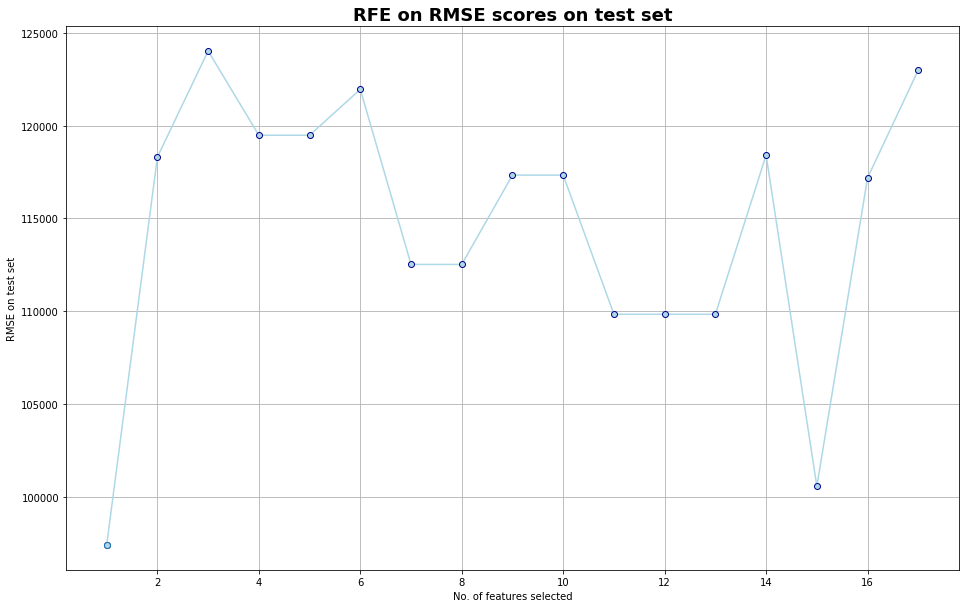

In [12]:
best = 1
for item in rmse_scores:
    if item < rmse_scores[best - 1]:
        best = rmse_scores.index(item) + 1
plt.figure(figsize = (16,10))
plt.grid()
plt.xlabel('No. of features selected')
plt.ylabel('RMSE on test set')
plt.title('RFE on RMSE scores on test set', fontsize = 18, fontweight = 'bold')
plt.plot(range(1,18), rmse_scores, marker = 'o', color = 'Lightblue', markeredgewidth = 1, markeredgecolor = 'Darkblue')
plt.plot(best , rmse_scores[best-1], marker = 'o', markerfacecolor = 'Lightblue')
plt.show()

## Feature Importance

In [13]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X_train, y_train = make_classification(n_samples=1000, n_features=21, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.15579
Feature: 1, Score: -0.52958
Feature: 2, Score: 0.07798
Feature: 3, Score: 0.03624
Feature: 4, Score: -0.46798
Feature: 5, Score: 0.06621
Feature: 6, Score: 0.00165
Feature: 7, Score: 0.07440
Feature: 8, Score: 0.48918
Feature: 9, Score: 0.07461
Feature: 10, Score: -0.66109
Feature: 11, Score: 0.06265
Feature: 12, Score: -0.40381
Feature: 13, Score: 0.01047
Feature: 14, Score: -0.09861
Feature: 15, Score: 0.18790
Feature: 16, Score: 0.03567
Feature: 17, Score: 0.01258
Feature: 18, Score: -0.02992
Feature: 19, Score: 0.26415
Feature: 20, Score: -0.11826


## After Feature Importance

In [14]:
X_train = train.drop(['deaths','Country','Region','Literacy (%)','Crops (%)','Climate','Industry','Codes' ], axis = 1)
y_train = train['deaths']
X_test = test.drop(['deaths','Country','Region','Literacy (%)','Crops (%)','Climate','Industry','Codes'], axis = 1)
y_test = test['deaths']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(155, 13)
(155,)
(39, 13)
(39,)


In [15]:
# Instantiating model
model = LogisticRegression()

In [16]:
# Training Model
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [18]:
print("Accuracy score on Training set after RFE : ", accuracy_score(y_train, y_train_hat))
print("Accuracy score on Test set after RFE : ", accuracy_score(y_test, y_test_hat))

print("MSE for test after RFE: ", mean_squared_error(y_test, y_test_hat))
print("R2 score after RFE : ", r2_score(y_test, y_test_hat))

Accuracy score on Training set after RFE :  0.025806451612903226
Accuracy score on Test set after RFE :  0.0
MSE for test after RFE:  11216479364.461538
R2 score after RFE :  -164.8320219819248


- After using the features that are important there is no improvement in the accuracy score as seen above.

## K- Nearest Neighbor

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=1)

# Train the model with the training data
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
# predictions on the test set
y_test_predictions = clf_knn.predict(X_test)
print('Accuracy Score on Test set :', accuracy_score(y_test, y_test_predictions ))

Accuracy Score on Test set : 0.02564102564102564


In [21]:
# finding the best K value
parameter_grid = {'n_neighbors': range(1, 135, 5)}
knn_clf = KNeighborsClassifier()

gs_knn = GridSearchCV(knn_clf, parameter_grid, scoring = 'accuracy', cv = KFold(n_splits =10, shuffle =True))

gs_knn.fit(X_train, y_train)

print('Best K value is :', gs_knn.best_params_['n_neighbors'])
print('Best Accuracy Score : %.4f\n' % gs_knn.best_score_ )

Best K value is : 51
Best Accuracy Score : 0.1042



In [22]:
# KNN classifier

knn = KNeighborsClassifier(n_neighbors = 51)
knn.fit(X_train, y_train)

scores_KNN = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores_KNN)
print('The accuracy mean is : ', scores_KNN.mean())
print('The standard deviation is : ', scores_KNN.std())

[0.0625     0.0625     0.0625     0.0625     0.125      0.13333333
 0.13333333 0.06666667 0.13333333 0.13333333]
The accuracy mean is :  0.09749999999999999
The standard deviation is :  0.034268141991586815


- We choose the best K value to reduce the noise in the model and have a better accuracy score.